In [69]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import math


import yfinance as yf
yf.pdr_override()
dataset = pd.read_csv('db/acoes1.csv')
dataset

,Date,VALE3.SA,KEPL3.SA,VULC3.SA,LEVE3.SA,GGBR4.SA,LREN3.SA,ALSO3.SA,DIRR3.SA,MILS3.SA,...,CMIG4.SA,ITSA4.SA,BBAS3.SA,TASA4.SA,SLCE3.SA,B3SA3.SA,PETR4.SA,SUZB3.SA,KLBN4.SA,BOVA11.SA
0,2012-02-01,45.599998,2.00,8.000000,16.316666,16.571428,9.630643,24.000000,9.970000,21.889999,...,12.346126,5.575240,27.480000,18.700001,6.921487,3.846666,24.950001,20.010000,1.596,63.520000
1,2012-02-02,45.570000,2.00,8.000000,16.533333,16.809523,9.799544,24.290001,10.050000,21.469999,...,12.286963,5.594366,27.400000,18.920000,6.900826,3.893333,24.530001,20.010000,1.552,63.590000
2,2012-02-03,45.869999,2.00,7.440000,16.663334,17.295238,9.975004,24.500000,10.100000,21.980000,...,12.269552,5.608710,27.299999,19.139999,6.892561,3.946666,24.610001,20.010000,1.552,64.209999
3,2012-02-06,45.849998,2.00,7.440000,16.633333,17.333332,10.002881,24.580000,10.170000,21.540001,...,12.387913,5.618273,27.150000,19.030001,6.838842,3.946666,24.860001,20.010000,1.532,64.190002
4,2012-02-07,45.840000,2.00,7.440000,16.566666,17.428572,9.873336,24.520000,10.170000,21.500000,...,12.342644,5.675651,27.250000,19.139999,6.979338,3.970000,25.600000,20.010000,1.550,64.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,2023-10-18,65.360001,10.44,18.540001,38.900002,21.660000,12.240000,21.990000,16.700001,10.600000,...,11.680000,8.750000,49.119999,15.480000,36.310001,11.130000,38.520000,56.080002,4.660,110.370003
2908,2023-10-19,64.419998,10.42,18.580000,38.759998,21.629999,12.340000,21.959999,16.750000,10.420000,...,11.780000,8.800000,49.500000,15.470000,36.689999,11.000000,38.340000,55.980000,4.650,110.599998
2909,2023-10-20,62.680000,10.46,18.290001,38.849998,21.450001,12.220000,22.020000,16.709999,10.600000,...,11.810000,8.740000,49.340000,15.340000,36.270000,11.150000,37.849998,54.900002,4.550,109.500000
2910,2023-10-23,62.560001,10.60,18.330000,38.000000,21.760000,12.400000,22.860001,17.049999,10.630000,...,11.910000,8.730000,49.270000,15.770000,36.500000,11.310000,35.349998,54.400002,4.480,109.349998


In [70]:
dataset.describe() # estatisticas descritivas sobre a tabela

,VALE3.SA,KEPL3.SA,VULC3.SA,LEVE3.SA,GGBR4.SA,LREN3.SA,ALSO3.SA,DIRR3.SA,MILS3.SA,RANI3.SA,...,CMIG4.SA,ITSA4.SA,BBAS3.SA,TASA4.SA,SLCE3.SA,B3SA3.SA,PETR4.SA,SUZB3.SA,KLBN4.SA,BOVA11.SA
count,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,...,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2885.000000
mean,47.765965,5.017679,6.412163,24.988164,16.132015,24.516686,23.603709,10.271497,11.311051,3.973104,...,8.767631,7.694502,31.446291,11.660416,18.084829,8.959497,20.518451,33.154767,3.197769,76.750707
std,24.917070,2.776581,4.248976,5.795705,6.938908,12.348208,6.832234,4.129806,9.630146,2.408326,...,2.942088,2.036496,9.505795,10.102775,13.393310,5.087073,7.193559,15.336942,1.017967,24.900290
min,8.600000,1.385000,0.960000,14.830000,3.123809,8.794336,14.200000,3.090000,1.700000,1.015000,...,2.755729,4.224575,12.700000,1.000000,5.512396,2.940000,4.200000,17.490000,1.532000,36.450001
25%,29.900000,2.750000,2.440000,21.530001,11.149999,12.901557,18.299999,6.150000,4.577500,2.400000,...,5.844630,5.736616,24.040001,2.287500,7.355371,4.155833,15.330000,20.010000,2.240000,53.740002
50%,42.160000,3.925000,6.210000,23.875000,14.847619,21.778383,22.200001,10.470000,6.950000,3.100000,...,9.210925,7.870129,30.059999,6.320000,10.272727,7.511667,20.150000,20.010000,2.940000,71.370003
75%,62.959999,7.200833,8.900000,26.780001,21.441072,33.002745,27.962499,13.000000,12.782500,5.250000,...,10.550242,9.238571,36.437500,21.340000,24.580578,13.010000,26.522501,46.470001,3.990000,101.000000
max,118.720001,13.005000,21.940001,52.520000,35.857143,60.388462,54.900002,22.309999,35.779999,13.000000,...,17.425406,12.424242,55.180000,36.740002,52.409088,22.466665,38.520000,79.180000,6.150000,125.750000


In [71]:
# dataset['VALE3.SA'][dataset['Date'] == '2021-05-05'], dataset['VALE3.SA'][dataset['Date'] == '2021-12-30']
# np.log(77.96/110.71)*100 
#calculo variancia anual

In [72]:
math.sqrt(dataset['VALE3.SA'].tail(1200).var()) #variancia dos ultimos x dias

19.907899619137062

In [73]:
dataset['VALE3.SA'].tail(300).std() # desvio padrão

9.575702228961745

In [74]:
stats.variation(dataset['VALE3.SA'].tail(300))*100 # coeficiente de variação
#O coeficiente de varição é usado para expressar a variabilidade dos dados estatísticos excluindo a influência da ordem de grandeza da variável

12.827707633032201

In [75]:
dataset.drop(labels= ['Date'], axis=1, inplace=True)
dataset

,VALE3.SA,KEPL3.SA,VULC3.SA,LEVE3.SA,GGBR4.SA,LREN3.SA,ALSO3.SA,DIRR3.SA,MILS3.SA,RANI3.SA,...,CMIG4.SA,ITSA4.SA,BBAS3.SA,TASA4.SA,SLCE3.SA,B3SA3.SA,PETR4.SA,SUZB3.SA,KLBN4.SA,BOVA11.SA
0,45.599998,2.00,8.000000,16.316666,16.571428,9.630643,24.000000,9.970000,21.889999,1.015,...,12.346126,5.575240,27.480000,18.700001,6.921487,3.846666,24.950001,20.010000,1.596,63.520000
1,45.570000,2.00,8.000000,16.533333,16.809523,9.799544,24.290001,10.050000,21.469999,1.015,...,12.286963,5.594366,27.400000,18.920000,6.900826,3.893333,24.530001,20.010000,1.552,63.590000
2,45.869999,2.00,7.440000,16.663334,17.295238,9.975004,24.500000,10.100000,21.980000,1.015,...,12.269552,5.608710,27.299999,19.139999,6.892561,3.946666,24.610001,20.010000,1.552,64.209999
3,45.849998,2.00,7.440000,16.633333,17.333332,10.002881,24.580000,10.170000,21.540001,1.015,...,12.387913,5.618273,27.150000,19.030001,6.838842,3.946666,24.860001,20.010000,1.532,64.190002
4,45.840000,2.00,7.440000,16.566666,17.428572,9.873336,24.520000,10.170000,21.500000,1.015,...,12.342644,5.675651,27.250000,19.139999,6.979338,3.970000,25.600000,20.010000,1.550,64.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,65.360001,10.44,18.540001,38.900002,21.660000,12.240000,21.990000,16.700001,10.600000,11.070,...,11.680000,8.750000,49.119999,15.480000,36.310001,11.130000,38.520000,56.080002,4.660,110.370003
2908,64.419998,10.42,18.580000,38.759998,21.629999,12.340000,21.959999,16.750000,10.420000,11.200,...,11.780000,8.800000,49.500000,15.470000,36.689999,11.000000,38.340000,55.980000,4.650,110.599998
2909,62.680000,10.46,18.290001,38.849998,21.450001,12.220000,22.020000,16.709999,10.600000,11.320,...,11.810000,8.740000,49.340000,15.340000,36.270000,11.150000,37.849998,54.900002,4.550,109.500000
2910,62.560001,10.60,18.330000,38.000000,21.760000,12.400000,22.860001,17.049999,10.630000,11.400,...,11.910000,8.730000,49.270000,15.770000,36.500000,11.310000,35.349998,54.400002,4.480,109.349998


In [76]:
taxas_retorno = (dataset/ dataset.shift(1) - 1)
taxas_retorno

,VALE3.SA,KEPL3.SA,VULC3.SA,LEVE3.SA,GGBR4.SA,LREN3.SA,ALSO3.SA,DIRR3.SA,MILS3.SA,RANI3.SA,...,CMIG4.SA,ITSA4.SA,BBAS3.SA,TASA4.SA,SLCE3.SA,B3SA3.SA,PETR4.SA,SUZB3.SA,KLBN4.SA,BOVA11.SA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000658,0.000000,0.000000,0.013279,0.014368,0.017538,0.012083,0.008024,-0.019187,0.000000,...,-0.004792,0.003431,-0.002911,0.011765,-0.002985,0.012132,-0.016834,0.000000,-0.027569,0.001102
2,0.006583,0.000000,-0.070000,0.007863,0.028895,0.017905,0.008645,0.004975,0.023754,0.000000,...,-0.001417,0.002564,-0.003650,0.011628,-0.001198,0.013699,0.003261,0.000000,0.000000,0.009750
3,-0.000436,0.000000,0.000000,-0.001800,0.002203,0.002795,0.003265,0.006931,-0.020018,0.000000,...,0.009647,0.001705,-0.005494,-0.005747,-0.007794,0.000000,0.010158,0.000000,-0.012887,-0.000311
4,-0.000218,0.000000,0.000000,-0.004008,0.005495,-0.012951,-0.002441,0.000000,-0.001857,0.000000,...,-0.003654,0.010213,0.003683,0.005780,0.020544,0.005912,0.029767,0.000000,0.011749,0.011840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,-0.036699,-0.015094,-0.002690,-0.026770,-0.030004,-0.044497,-0.053379,-0.045169,-0.002822,-0.042388,...,-0.027477,-0.010181,-0.004862,-0.019633,-0.020237,-0.012422,0.022564,-0.024187,-0.018947,-0.017536
2908,-0.014382,-0.001916,0.002157,-0.003599,-0.001385,0.008170,-0.001364,0.002994,-0.016981,0.011743,...,0.008562,0.005714,0.007736,-0.000646,0.010465,-0.011680,-0.004673,-0.001783,-0.002146,0.002084
2909,-0.027010,0.003839,-0.015608,0.002322,-0.008322,-0.009724,0.002732,-0.002388,0.017275,0.010714,...,0.002547,-0.006818,-0.003232,-0.008403,-0.011447,0.013636,-0.012780,-0.019293,-0.021505,-0.009946
2910,-0.001914,0.013384,0.002187,-0.021879,0.014452,0.014730,0.038147,0.020347,0.002830,0.007067,...,0.008467,-0.001144,-0.001419,0.028031,0.006341,0.014350,-0.066050,-0.009107,-0.015385,-0.001370


In [77]:
taxas_retorno.std() * 100 # desvio padrao


VALE3.SA     2.689448
KEPL3.SA     2.557685
VULC3.SA     4.075714
LEVE3.SA     2.225623
GGBR4.SA     2.769127
LREN3.SA     2.386875
ALSO3.SA     2.255854
DIRR3.SA     2.696694
MILS3.SA     3.403648
RANI3.SA     3.415339
CAMB3.SA     2.722476
CSUD3.SA     2.977987
CLSC4.SA     2.325926
CMIG4.SA     2.613798
ITSA4.SA     1.889646
BBAS3.SA     2.621293
TASA4.SA     4.263988
SLCE3.SA     2.252810
B3SA3.SA     2.375426
PETR4.SA     3.052999
SUZB3.SA     1.839374
KLBN4.SA     1.733927
BOVA11.SA    1.566576
dtype: float64

In [78]:
taxas_retorno.cov() #covariancia
#é uma medida estatística onde é possível comparar duas variáveis, permitindo entender como elas se relacionam entre si

,VALE3.SA,KEPL3.SA,VULC3.SA,LEVE3.SA,GGBR4.SA,LREN3.SA,ALSO3.SA,DIRR3.SA,MILS3.SA,RANI3.SA,...,CMIG4.SA,ITSA4.SA,BBAS3.SA,TASA4.SA,SLCE3.SA,B3SA3.SA,PETR4.SA,SUZB3.SA,KLBN4.SA,BOVA11.SA
VALE3.SA,0.000723,0.000095,0.000098,0.000097,0.000457,0.000148,0.000116,0.000128,0.000165,0.000113,...,0.000192,0.000165,0.000234,0.000143,0.000100,0.000193,0.000361,0.000082,0.000101,0.000244
KEPL3.SA,0.000095,0.000654,0.000081,0.000073,0.000106,0.000133,0.000113,0.000140,0.000154,0.000110,...,0.000123,0.000088,0.000132,0.000103,0.000060,0.000131,0.000151,0.000028,0.000045,0.000108
VULC3.SA,0.000098,0.000081,0.001661,0.000133,0.000195,0.000203,0.000197,0.000222,0.000241,0.000082,...,0.000199,0.000133,0.000213,0.000143,0.000079,0.000195,0.000181,0.000016,0.000056,0.000147
LEVE3.SA,0.000097,0.000073,0.000133,0.000495,0.000143,0.000153,0.000131,0.000157,0.000194,0.000085,...,0.000145,0.000125,0.000152,0.000111,0.000088,0.000145,0.000161,0.000023,0.000060,0.000128
GGBR4.SA,0.000457,0.000106,0.000195,0.000143,0.000767,0.000208,0.000174,0.000194,0.000252,0.000135,...,0.000261,0.000223,0.000308,0.000195,0.000123,0.000243,0.000393,0.000092,0.000134,0.000265
LREN3.SA,0.000148,0.000133,0.000203,0.000153,0.000208,0.000570,0.000280,0.000276,0.000293,0.000123,...,0.000264,0.000234,0.000310,0.000134,0.000080,0.000305,0.000284,0.000011,0.000076,0.000241
ALSO3.SA,0.000116,0.000113,0.000197,0.000131,0.000174,0.000280,0.000509,0.000257,0.000272,0.000112,...,0.000211,0.000173,0.000231,0.000145,0.000077,0.000233,0.000228,0.000018,0.000062,0.000181
DIRR3.SA,0.000128,0.000140,0.000222,0.000157,0.000194,0.000276,0.000257,0.000727,0.000351,0.000125,...,0.000247,0.000214,0.000286,0.000160,0.000101,0.000287,0.000279,0.000007,0.000066,0.000217
MILS3.SA,0.000165,0.000154,0.000241,0.000194,0.000252,0.000293,0.000272,0.000351,0.001158,0.000152,...,0.000279,0.000222,0.000307,0.000162,0.000116,0.000285,0.000316,0.000027,0.000081,0.000225
RANI3.SA,0.000113,0.000110,0.000082,0.000085,0.000135,0.000123,0.000112,0.000125,0.000152,0.001166,...,0.000090,0.000073,0.000107,0.000146,0.000066,0.000098,0.000121,0.000052,0.000084,0.000100


In [79]:
taxas_retorno.corr() #correlação 
#Correlação: resume o grau de relacionamento entre duas variáveis

,VALE3.SA,KEPL3.SA,VULC3.SA,LEVE3.SA,GGBR4.SA,LREN3.SA,ALSO3.SA,DIRR3.SA,MILS3.SA,RANI3.SA,...,CMIG4.SA,ITSA4.SA,BBAS3.SA,TASA4.SA,SLCE3.SA,B3SA3.SA,PETR4.SA,SUZB3.SA,KLBN4.SA,BOVA11.SA
VALE3.SA,1.000000,0.138508,0.089800,0.162255,0.613190,0.230835,0.190655,0.175929,0.179833,0.122975,...,0.273259,0.323875,0.331219,0.124505,0.164556,0.302107,0.439065,0.165561,0.215850,0.577471
KEPL3.SA,0.138508,1.000000,0.077373,0.128127,0.149485,0.217476,0.196662,0.202784,0.176877,0.125488,...,0.183576,0.182297,0.196656,0.094029,0.104884,0.214824,0.193860,0.059840,0.102294,0.268973
VULC3.SA,0.089800,0.077373,1.000000,0.146838,0.173046,0.208629,0.214799,0.202005,0.173468,0.058742,...,0.186792,0.173050,0.199772,0.082052,0.085852,0.201572,0.145242,0.021410,0.079467,0.228229
LEVE3.SA,0.162255,0.128127,0.146838,1.000000,0.231545,0.287389,0.261177,0.262019,0.255971,0.111360,...,0.248583,0.296109,0.260419,0.116595,0.175311,0.273533,0.237097,0.056974,0.154555,0.365180
GGBR4.SA,0.613190,0.149485,0.173046,0.231545,1.000000,0.315422,0.278287,0.260278,0.267013,0.142788,...,0.360240,0.426402,0.424136,0.165181,0.197129,0.370001,0.465139,0.180104,0.279665,0.610886
LREN3.SA,0.230835,0.217476,0.208629,0.287389,0.315422,1.000000,0.520069,0.429547,0.360106,0.150412,...,0.423114,0.518672,0.495303,0.131690,0.148796,0.537059,0.389827,0.025165,0.183157,0.642281
ALSO3.SA,0.190655,0.196662,0.214799,0.261177,0.278287,0.520069,1.000000,0.422938,0.354055,0.144794,...,0.357666,0.405294,0.391119,0.150412,0.150541,0.434006,0.331057,0.044385,0.158082,0.509102
DIRR3.SA,0.175929,0.202784,0.202005,0.262019,0.260278,0.429547,0.422938,1.000000,0.382040,0.135841,...,0.350167,0.419049,0.405046,0.138773,0.165975,0.448168,0.338438,0.015095,0.141087,0.510886
MILS3.SA,0.179833,0.176877,0.173468,0.255971,0.267013,0.360106,0.354055,0.382040,1.000000,0.130430,...,0.314158,0.345372,0.344274,0.111417,0.151532,0.352275,0.304345,0.042427,0.137935,0.420187
RANI3.SA,0.122975,0.125488,0.058742,0.111360,0.142788,0.150412,0.144794,0.135841,0.130430,1.000000,...,0.100713,0.113311,0.119721,0.100300,0.086393,0.120735,0.116467,0.082992,0.141571,0.186633


<Axes: >

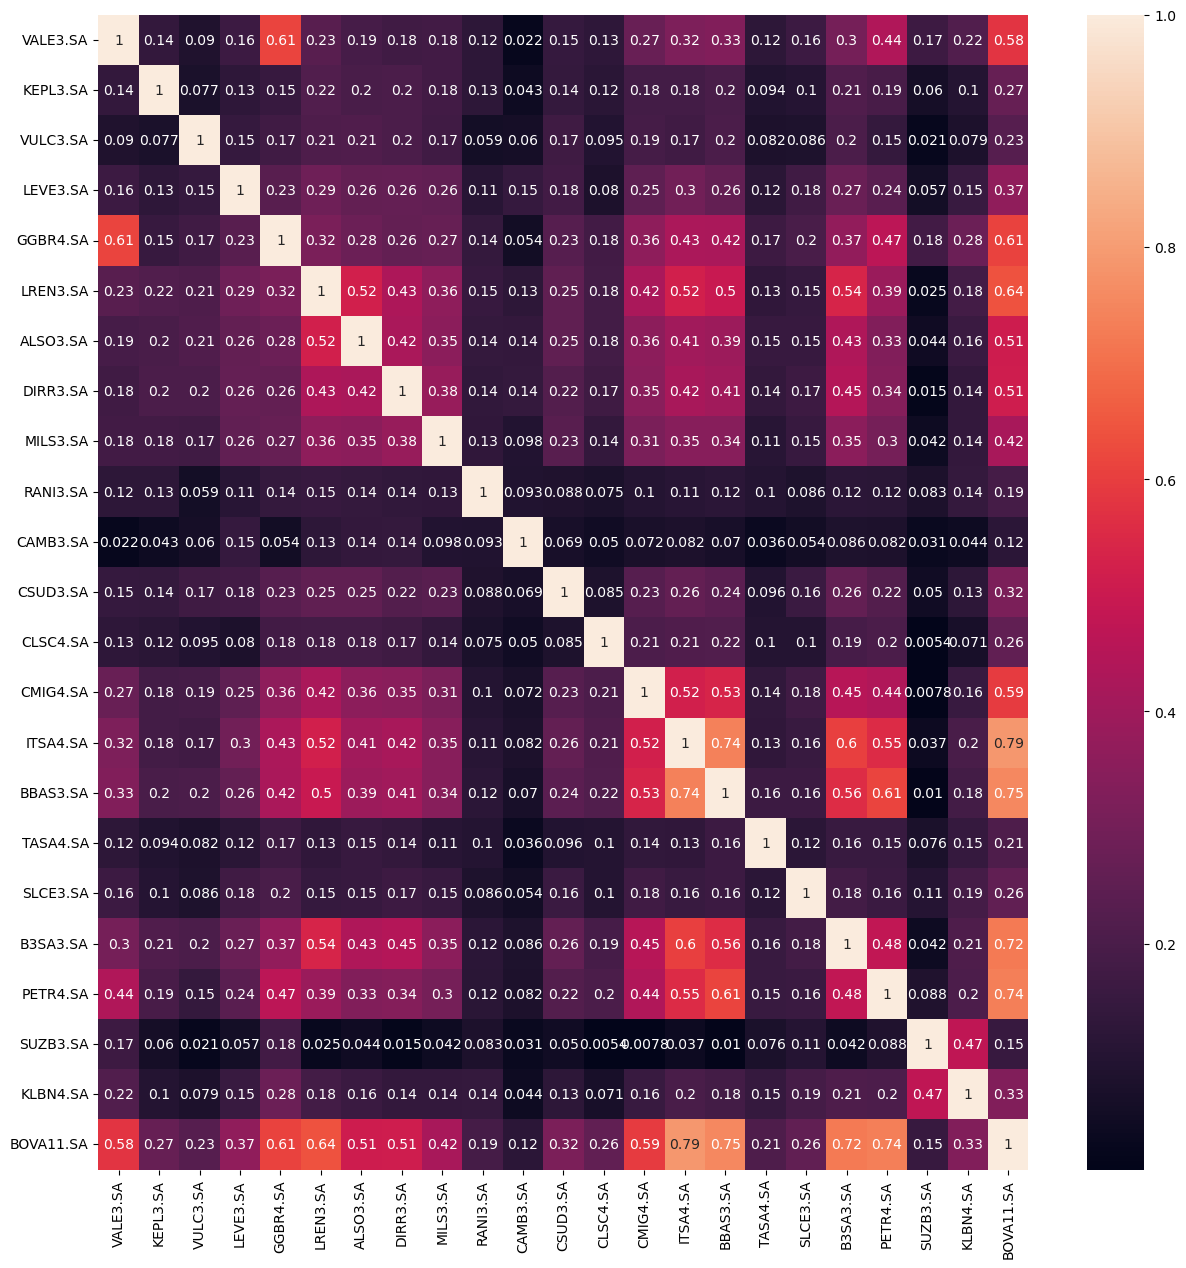

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(taxas_retorno.corr(), annot=True)
#heat map da correlação

In [81]:
taxas_retorno.cov()*246 #covariancia anual

,VALE3.SA,KEPL3.SA,VULC3.SA,LEVE3.SA,GGBR4.SA,LREN3.SA,ALSO3.SA,DIRR3.SA,MILS3.SA,RANI3.SA,...,CMIG4.SA,ITSA4.SA,BBAS3.SA,TASA4.SA,SLCE3.SA,B3SA3.SA,PETR4.SA,SUZB3.SA,KLBN4.SA,BOVA11.SA
VALE3.SA,0.177935,0.023438,0.024215,0.023892,0.112340,0.036453,0.028455,0.031388,0.040496,0.027788,...,0.047255,0.040491,0.057442,0.035124,0.024526,0.047479,0.088686,0.020148,0.024762,0.059998
KEPL3.SA,0.023438,0.160927,0.019841,0.017942,0.026045,0.032660,0.027913,0.034407,0.037879,0.026966,...,0.030190,0.021674,0.032434,0.025227,0.014867,0.032108,0.037239,0.006925,0.011160,0.026538
VULC3.SA,0.024215,0.019841,0.408642,0.032766,0.048044,0.049928,0.048583,0.054618,0.059198,0.020115,...,0.048952,0.032786,0.052503,0.035079,0.019392,0.048008,0.044459,0.003948,0.013815,0.036090
LEVE3.SA,0.023892,0.017942,0.032766,0.121854,0.035105,0.037557,0.032258,0.038686,0.047700,0.020823,...,0.035574,0.030635,0.037375,0.027220,0.021623,0.035574,0.039631,0.005738,0.014672,0.031415
GGBR4.SA,0.112340,0.026045,0.048044,0.035105,0.188634,0.051286,0.042764,0.047813,0.061909,0.033220,...,0.064142,0.054888,0.075735,0.047979,0.030252,0.059872,0.096736,0.022567,0.033033,0.065261
LREN3.SA,0.036453,0.032660,0.049928,0.037557,0.051286,0.140150,0.068887,0.068015,0.071968,0.030163,...,0.064937,0.057549,0.076234,0.032971,0.019683,0.074908,0.069882,0.002718,0.018647,0.059350
ALSO3.SA,0.028455,0.027913,0.048583,0.032258,0.042764,0.068887,0.125186,0.063293,0.066875,0.027443,...,0.051880,0.042501,0.056894,0.035591,0.018820,0.057211,0.056089,0.004531,0.015211,0.044443
DIRR3.SA,0.031388,0.034407,0.054618,0.038686,0.047813,0.068015,0.063293,0.178895,0.086262,0.030777,...,0.060718,0.052531,0.070435,0.039254,0.024805,0.070623,0.068545,0.001842,0.016229,0.053311
MILS3.SA,0.040496,0.037879,0.059198,0.047700,0.061909,0.071968,0.066875,0.086262,0.284987,0.037299,...,0.068754,0.054645,0.075561,0.039779,0.028583,0.070065,0.077799,0.006534,0.020026,0.055297
RANI3.SA,0.027788,0.026966,0.020115,0.020823,0.033220,0.030163,0.027443,0.030777,0.037299,0.286948,...,0.022117,0.017990,0.026367,0.035932,0.016352,0.024096,0.029874,0.012825,0.020624,0.024722


In [82]:
len(pesos)

23

In [83]:
pesos = np.array([0.03, 0.034, 0.0255, 0.0385, 0.0305, 0.0235, 0.0195,0.0195,0.015,0.02,0.0195,0.0195,0.02,0.02,0.0285,0.024,0.02,0.012,0.0185,0.019,0.029,0.017,0])
pesos1 = 2*pesos
(np.dot(taxas_retorno.cov()*246, pesos1)) #covariancia anual e pesos

array([0.04671335, 0.03327043, 0.05397237, 0.03528574, 0.05793227,
       0.0493516 , 0.04241582, 0.05000965, 0.05748617, 0.03512315,
       0.02004849, 0.0411998 , 0.02460306, 0.05109984, 0.04222927,
       0.05897078, 0.04898555, 0.02332569, 0.05094504, 0.06450915,
       0.01304647, 0.02126284, 0.04412101])

In [84]:
variancia_carteira = np.dot(pesos1, (np.dot(taxas_retorno.cov()*246, pesos1))) #variancia portifolio CARTEIRA
variancia_carteira

0.04211192983156837

In [85]:
math.sqrt(np.dot(pesos1, (np.dot(taxas_retorno.cov()*246, pesos1))))*100 ## volatilidade do portifolio CARTEIRA

20.52119144483779

In [86]:
pesos = np.array([0,0,0,0,0,0,0,0,0,0,00,0,0,0,0,0,0,0,0,0,0,0,0.5])
pesos1 = 2*pesos
(np.dot(taxas_retorno.cov()*246, pesos1)) #covariancia anual e pesos
variancia_ibov = np.dot(pesos1, (np.dot(taxas_retorno.cov()*246, pesos1))) 
math.sqrt(np.dot(pesos1, (np.dot(taxas_retorno.cov()*246, pesos1))))*100 ## volatilidade do portifolio IBOV

24.570786744382538

In [87]:
taxas_retorno.std()*math.sqrt(246) #desvio padrão anual

VALE3.SA     0.421823
KEPL3.SA     0.401157
VULC3.SA     0.639251
LEVE3.SA     0.349075
GGBR4.SA     0.434321
LREN3.SA     0.374367
ALSO3.SA     0.353817
DIRR3.SA     0.422960
MILS3.SA     0.533841
RANI3.SA     0.535675
CAMB3.SA     0.427004
CSUD3.SA     0.467079
CLSC4.SA     0.364807
CMIG4.SA     0.409958
ITSA4.SA     0.296379
BBAS3.SA     0.411134
TASA4.SA     0.668780
SLCE3.SA     0.353339
B3SA3.SA     0.372571
PETR4.SA     0.478844
SUZB3.SA     0.288495
KLBN4.SA     0.271956
BOVA11.SA    0.245708
dtype: float64

In [88]:
pesos = np.array([0,0,0,0,0,0,0,0,0,0,00,0,0,0,0,0,0,0,0,0,0,0,0.5])
pesos1 = 2*pesos
taxas_retorno.var() * 246 #variancia anual
variancia_pesos = (taxas_retorno.var() * 246) * pesos1
sub = 0
for i in variancia_pesos[0:len(variancia_pesos)]:
    sub = sub - i
sub    
risco_nao_sistematico_ibov = variancia_ibov - sub
risco_nao_sistematico_ibov

0.12074471224758491

In [89]:
pesos = np.array([0.038, 0.024, 0.0195, 0.0285, 0.0285, 0.0195, 0.0195,0.0195,0.015,0.02,0.0195,0.0195,0.004,0.02,0.02,0.0285,0.024,0.02,0.012,0.0185,0.019,0.029,0])
pesos1 = 2*pesos
taxas_retorno.var() * 246 #variancia anual
variancia_pesos = (taxas_retorno.var() * 246) * pesos1
variancia_pesos


VALE3.SA     0.013523
KEPL3.SA     0.007725
VULC3.SA     0.015937
LEVE3.SA     0.006946
GGBR4.SA     0.010752
LREN3.SA     0.005466
ALSO3.SA     0.004882
DIRR3.SA     0.006977
MILS3.SA     0.008550
RANI3.SA     0.011478
CAMB3.SA     0.007111
CSUD3.SA     0.008508
CLSC4.SA     0.001065
CMIG4.SA     0.006723
ITSA4.SA     0.003514
BBAS3.SA     0.009635
TASA4.SA     0.021469
SLCE3.SA     0.004994
B3SA3.SA     0.003331
PETR4.SA     0.008484
SUZB3.SA     0.003163
KLBN4.SA     0.004290
BOVA11.SA    0.000000
dtype: float64

In [90]:
sub = 0
for i in variancia_pesos[0:len(variancia_pesos)]:
    sub = sub - i
sub    

-0.17452031851952157

In [91]:
#risco n sistematic  
risto_nao_sistematico_carteira = variancia_carteira - sub
risto_nao_sistematico_carteira

0.21663224835108993